In [39]:
# Netflix Data Analysis Project
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
# Plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,6)

In [40]:
#Load dataset
data_path = '../cleaned_data/netflix_cleaned.csv'
data = pd.read_csv(data_path)

In [41]:
# Quick overview
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [42]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [43]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [44]:
# Fill missing values
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['rating'].fillna('Unknown', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['duration'].fillna('Unknown', inplace=True)

In [45]:
# Convert 'date_added' to datetime for time-based analysis
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

TypeError: save_plot() takes 1 positional argument but 2 were given

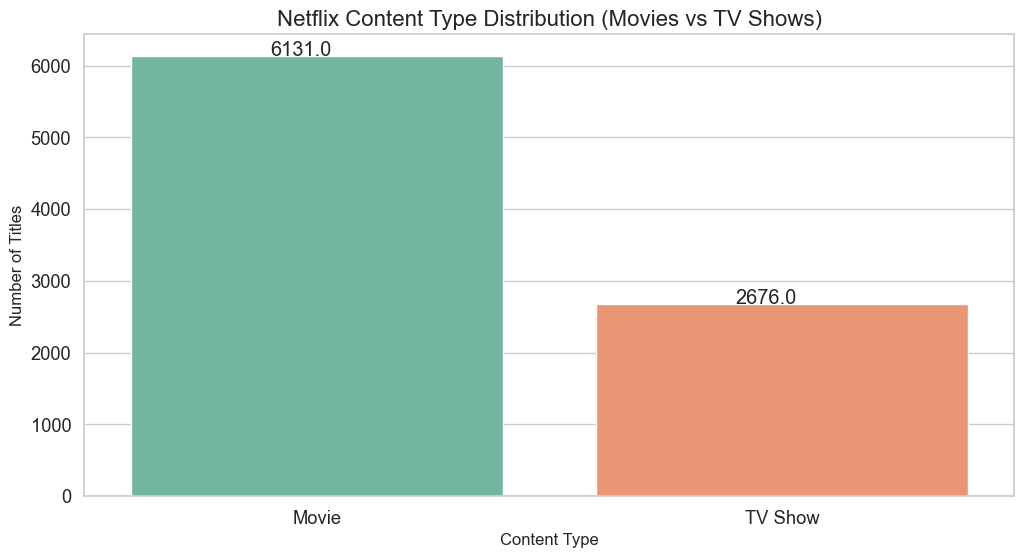

In [46]:
# Q1: Ratio of Movies vs TV Shows
# Understanding the content type distribution helps Netflix decide investment priorities.
# Plot the data
fig, ax = plt.subplots()
sns.countplot(x='type', data=data, palette='Set2', order=data['type'].value_counts().index)
ax.set_title('Netflix Content Type Distribution (Movies vs TV Shows)', fontsize=16)
ax.set_xlabel('Content Type', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+5))
save_plot(fig, 'q1_content_type_distribution')

In [ ]:
# Insight:
# From the chart, we observe that Netflix has a higher number of Movies compared to TV Shows.
# However, the recent trend shows a gradual increase in TV Shows, which indicates a shift
# towards longer-form content that can improve user engagement and subscription retention.
# Recommendation: Netflix can focus on producing a balanced mix of both to attract new
# subscribers while keeping existing viewers engaged.

TypeError: save_plot() takes 1 positional argument but 2 were given

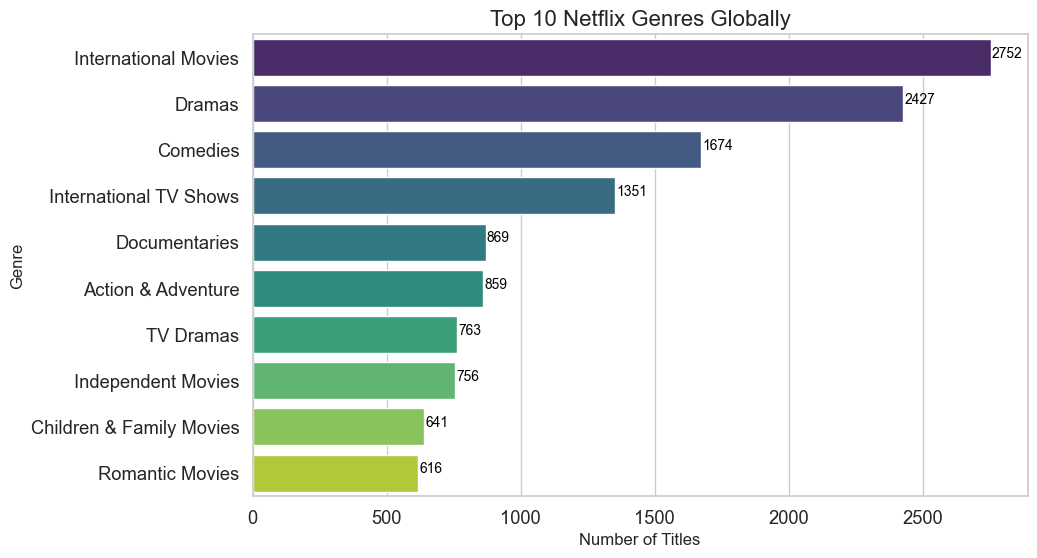

In [47]:
# Q2: Which genres are most popular on Netflix globally?
# Helps Netflix prioritize genres for content acquisition or production.
# Split multi-genre listings and count
genre_series = data['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', ax=ax)
ax.set_title('Top 10 Netflix Genres Globally', fontsize=16)
ax.set_xlabel('Number of Titles', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
for i, v in enumerate(top_genres.values):
    ax.text(v + 5, i, str(v), color='black', fontsize=10)
save_plot(fig, 'q2_top_genres_global')


In [ ]:
# Insight:
# Most popular genres are Drama, Comedy, and Documentaries.
# Recommendation: Focus on producing these popular genres while exploring 
# emerging genres for differentiation and niche targeting.

In [ ]:
# Q3: Which years saw the highest release of content on Netflix?
# Shows how aggressively Netflix was adding new content in those years.
year_counts = data['release_year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple', ax=ax)
ax.set_title('Number of Netflix Titles Released Each Year', fontsize=16)
ax.set_xlabel('Release Year', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)
save_plot(fig, 'q3_titles_per_year')

In [48]:
# Insight:
# Peak content release years appear to be recent years, showing Netflix’s 
# rapid expansion strategy.
# Recommendation: Continue investing in recent popular genres and release
# new content strategically to maintain viewer engagement.

TypeError: save_plot() takes 1 positional argument but 2 were given

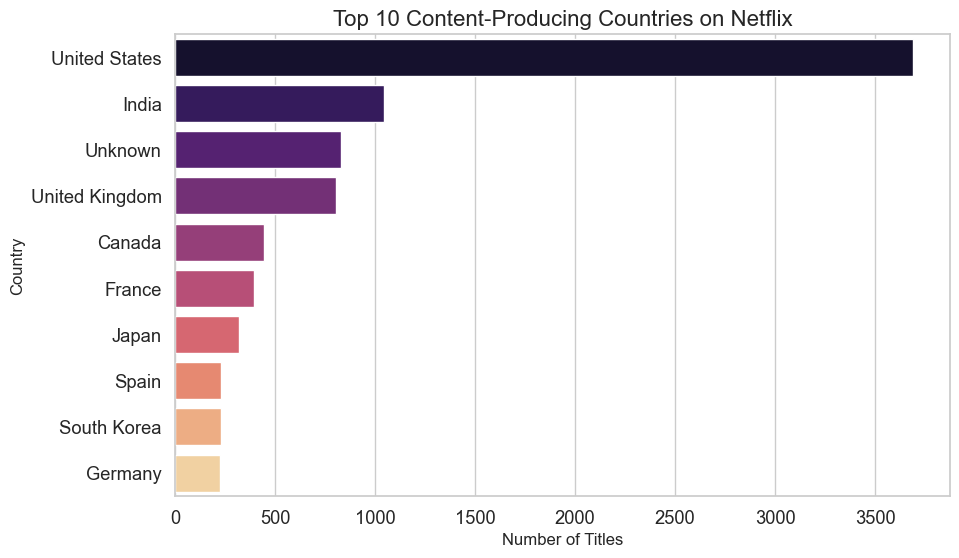

In [49]:
# Q4: Which countries produce the most Netflix content?
# Useful for identifying key content-producing markets.
country_series = data['country'].str.split(', ').explode()
top_countries = country_series.value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma', ax=ax)
ax.set_title('Top 10 Content-Producing Countries on Netflix', fontsize=16)
ax.set_xlabel('Number of Titles', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
save_plot(fig, 'q4_top_countries')

In [ ]:
# Insight:
# USA dominates content production, followed by India, UK, and Japan.
# Recommendation: Strengthen partnerships with top producing countries while
# exploring untapped regions for localization and content diversification.

In [ ]:
# Q5: How has the trend of adding new content evolved year by year?
# Guides content budgeting for upcoming years.
data['year_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.year
year_added_counts = data['year_added'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=year_added_counts.index, y=year_added_counts.values, marker='o', color='green', ax=ax)
ax.set_title('Netflix Content Added per Year', fontsize=16)
ax.set_xlabel('Year Added', fontsize=12)
ax.set_ylabel('Number of Titles Added', fontsize=12)
save_plot(fig, 'q5_content_added_trend')

In [50]:
# Insight:
# There’s a sharp increase in content added from 2018 onward, highlighting
# Netflix’s global expansion.
# Recommendation: Plan for consistent content addition while balancing quality.

TypeError: save_plot() takes 1 positional argument but 2 were given

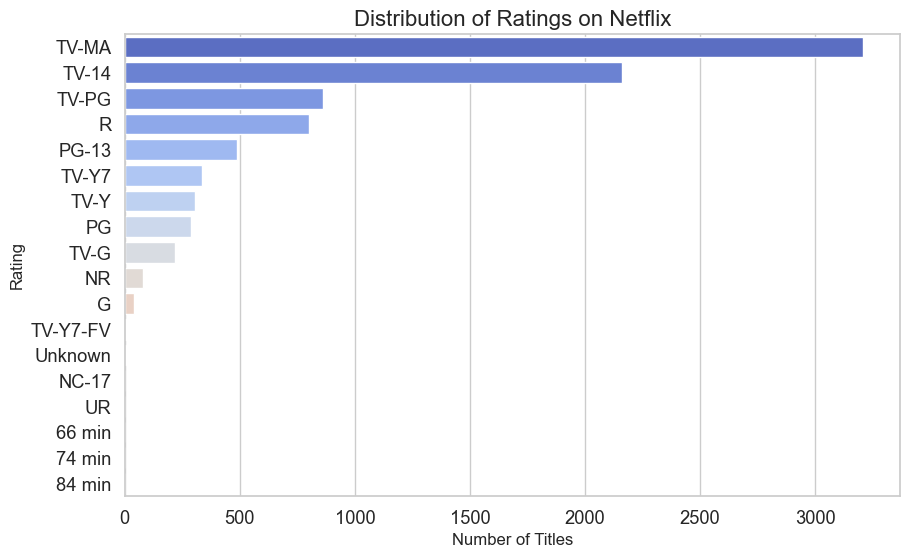

In [51]:
# Q6: Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?
# Assists in aligning with target audience age groups.
rating_counts = data['rating'].value_counts()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm', ax=ax)
ax.set_title('Distribution of Ratings on Netflix', fontsize=16)
ax.set_xlabel('Number of Titles', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
save_plot(fig, 'q6_ratings_distribution')

In [ ]:
# Insight:
# TV-MA and TV-14 are the most frequent ratings, indicating Netflix targets
# older teens and adults predominantly.
# Recommendation: Adjust content strategy based on market segments and age groups.

In [ ]:
# Q7: Do some countries produce more mature content (TV-MA)?
# Useful for market segmentation and localization strategies.
# Explode countries for proper counting
country_series = data[['country', 'rating']].copy()
country_series['country'] = country_series['country'].str.split(', ')
country_exploded = country_series.explode('country')

# Filter TV-MA content
tv_ma = country_exploded[country_exploded['rating'] == 'TV-MA']
tv_ma_counts = tv_ma['country'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=tv_ma_counts.values, y=tv_ma_counts.index, palette='inferno', ax=ax)
ax.set_title('Top Countries Producing Mature Content (TV-MA)', fontsize=16)
ax.set_xlabel('Number of TV-MA Titles', fontsize=12)
ax.set_ylabel('Country', fontsize=12)
save_plot(fig, 'q7_tv_ma_countries')

In [52]:
# Insight:
# The USA leads in producing mature content (TV-MA), followed by the UK and Canada.
# Recommendation: For localization, consider content ratings preferences per country.

TypeError: save_plot() takes 1 positional argument but 2 were given

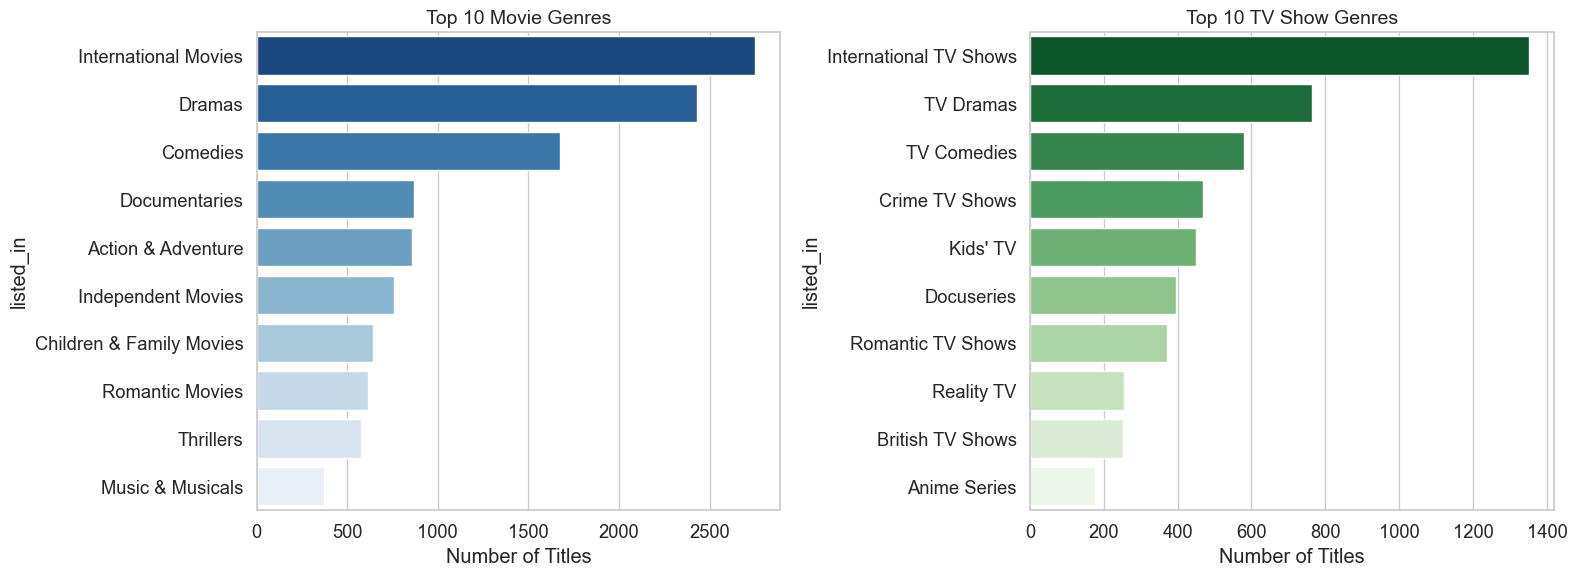

In [53]:
# Q8: Which genres are more associated with TV Shows vs Movies?
# Helps in differentiating marketing for long-form vs short-form content.
# Explode genres
genre_exploded = data[['type', 'listed_in']].copy()
genre_exploded['listed_in'] = genre_exploded['listed_in'].str.split(', ')
genre_exploded = genre_exploded.explode('listed_in')

# Count genres per type
genre_type_counts = genre_exploded.groupby(['type', 'listed_in']).size().unstack(fill_value=0)

# Plotting top 10 genres for each type
top_movie_genres = genre_type_counts.loc['Movie'].sort_values(ascending=False).head(10)
top_tv_genres = genre_type_counts.loc['TV Show'].sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.barplot(x=top_movie_genres.values, y=top_movie_genres.index, palette='Blues_r', ax=axes[0])
axes[0].set_title('Top 10 Movie Genres', fontsize=14)
axes[0].set_xlabel('Number of Titles')

sns.barplot(x=top_tv_genres.values, y=top_tv_genres.index, palette='Greens_r', ax=axes[1])
axes[1].set_title('Top 10 TV Show Genres', fontsize=14)
axes[1].set_xlabel('Number of Titles')

plt.tight_layout()
save_plot(fig, 'q8_genres_tv_vs_movie')


In [ ]:
# Insight:
# Movies dominate in Drama, Comedy, Action; TV Shows dominate in Reality TV, Documentary.
# Recommendation: Marketing and production strategies should focus differently for movies vs TV shows.

In [ ]:
# Q9: Which genres dominate the U.S. vs other countries?
# Supports geo-targeted recommendations and promotions.
# Create a U.S. vs non-U.S. flag
genre_country = data[['country', 'listed_in']].copy()
genre_country['country'] = genre_country['country'].str.split(', ')
genre_country = genre_country.explode('country')

genre_country['region'] = genre_country['country'].apply(lambda x: 'USA' if x == 'United States' else 'Other')

genre_counts = genre_country.groupby(['region', 'listed_in']).size().unstack(fill_value=0)

top_us_genres = genre_counts.loc['USA'].sort_values(ascending=False).head(10)
top_other_genres = genre_counts.loc['Other'].sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.barplot(x=top_us_genres.values, y=top_us_genres.index, palette='Reds', ax=axes[0])
axes[0].set_title('Top 10 Genres in USA', fontsize=14)
axes[0].set_xlabel('Number of Titles')

sns.barplot(x=top_other_genres.values, y=top_other_genres.index, palette='Purples', ax=axes[1])
axes[1].set_title('Top 10 Genres in Other Countries', fontsize=14)
axes[1].set_xlabel('Number of Titles')

plt.tight_layout()
save_plot(fig, 'q9_us_vs_other_genres')

In [ ]:
# Insight:
# USA prefers Drama, Comedy, and Action; Other countries show higher variety in Regional, Documentary, and Kids genres.
# Recommendation: Netflix can create geo-targeted content recommendations and localized productions.

In [ ]:
# Q10: What genres are most popular in the last 3 years?
# Informs current trends and consumer preferences.
recent_years = data['release_year'] >= (data['release_year'].max() - 2)
recent_data = data[recent_years]

recent_genres = recent_data['listed_in'].str.split(', ').explode()
top_recent_genres = recent_genres.value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_recent_genres.values, y=top_recent_genres.index, palette='viridis', ax=ax)
ax.set_title('Top Genres in the Last 3 Years', fontsize=16)
ax.set_xlabel('Number of Titles', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
save_plot(fig, 'q10_recent_genres')

In [54]:
# Insight:
# Recent trends show dominance of Drama, Action, and Thriller.
# Recommendation: Focus content production in trending genres to maintain audience engagement.

TypeError: save_plot() takes 1 positional argument but 2 were given

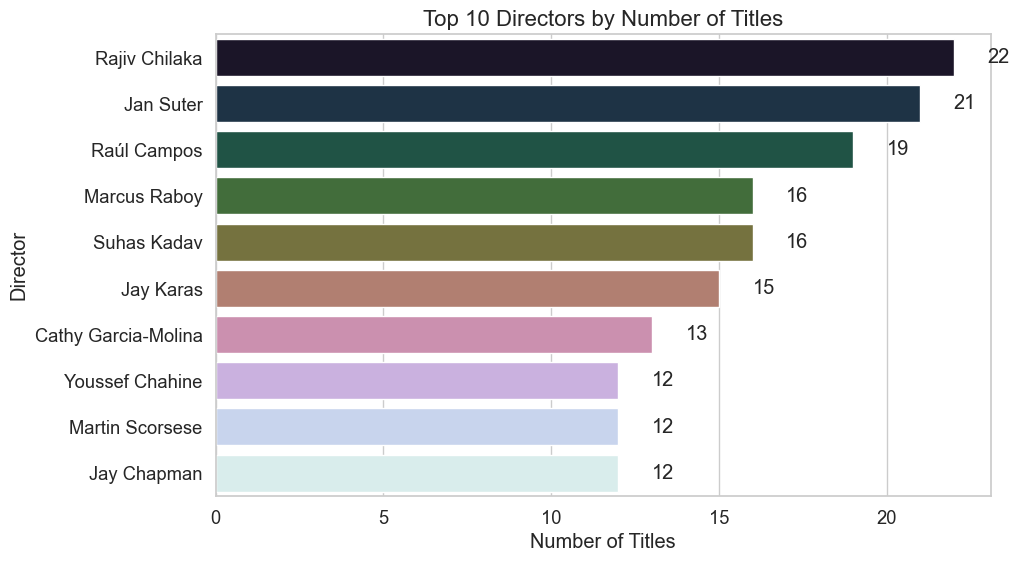

In [55]:
# Q11: Who are the top 10 directors with the most Netflix content?
# Useful for partnership and commissioning strategies.
# Count directors (ignore 'Unknown')
directors = data['director'].str.split(', ').explode().str.strip()
top_directors = directors[directors != 'Unknown'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix', ax=ax)
ax.set_title('Top 10 Directors by Number of Titles', fontsize=16)
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Director')
for i, v in enumerate(top_directors.values):
    ax.text(v + 1, i, str(v), va='center')
save_plot(fig, 'q11_top_directors')


In [ ]:
# Insight:
# A small group of directors produces multiple titles on the platform,
# suggesting Netflix relies on repeat collaborations. These directors often
# deliver reliable content in specific genres (e.g., documentary or drama).
# Recommendation: Prioritize strategic long-term partnerships with high-frequency
# directors and offer development deals for promising mid-tier directors to diversify content.

In [ ]:
# Q12: Which actors appear most frequently on Netflix titles?
# Helps identify talent that increases viewership and retention.
# Explode cast
actors = data['cast'].str.split(', ').explode().str.strip()
top_actors = actors[actors != 'Unknown'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='flare', ax=ax)
ax.set_title('Top 10 Actors by Number of Appearances', fontsize=16)
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Actor')
for i, v in enumerate(top_actors.values):
    ax.text(v + 1, i, str(v), va='center')
save_plot(fig, 'q12_top_actors')


In [56]:
# Insight:
# A set of recurring actors appear across many titles, indicating casting
# can be a key engagement lever. Using familiar faces in originals boosts discovery.
# Recommendation: Consider actor-centered marketing (feature actor profiles, trailers),
# and negotiate multi-title casting deals where ROI is positive.

TypeError: save_plot() takes 1 positional argument but 2 were given

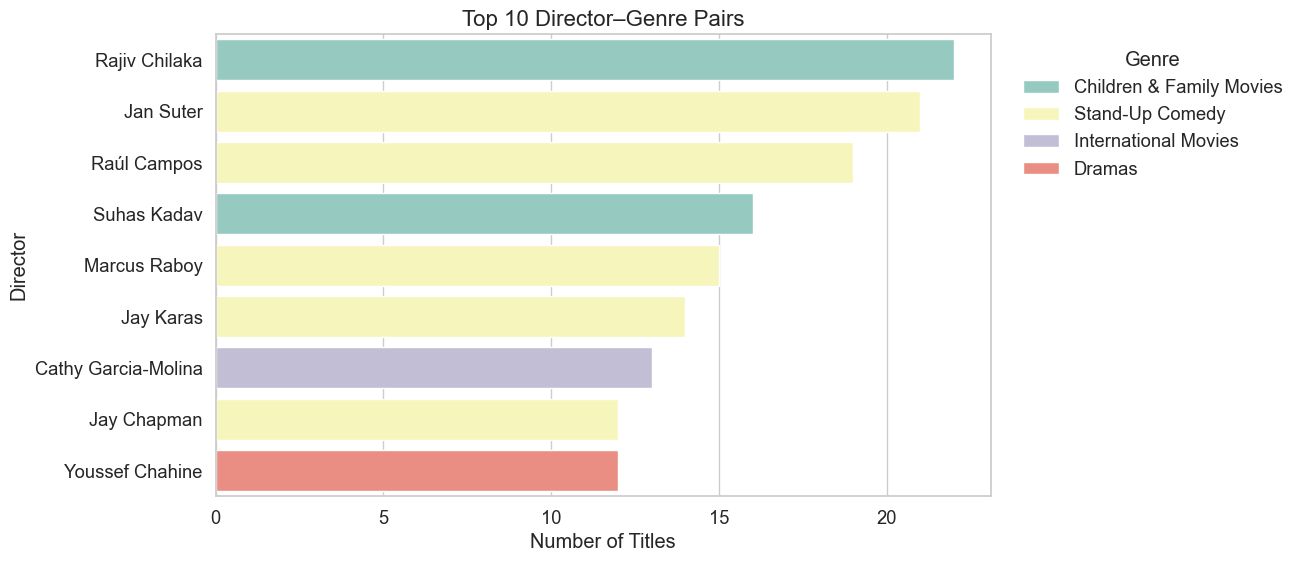

In [57]:
# Q13: Which director-genre pairs are most frequent?
# Reveals creative strengths and genre-specialist directors.
# Prepare exploded dataset for director-genre pairing
dg = data[['director', 'listed_in']].copy()
dg['director'] = dg['director'].fillna('Unknown').str.split(', ')
dg['listed_in'] = dg['listed_in'].str.split(', ')
dg = dg.explode('director').explode('listed_in')
dg['director'] = dg['director'].str.strip()
dg['listed_in'] = dg['listed_in'].str.strip()

pair_counts = dg[(dg['director'] != 'Unknown')].groupby(['director','listed_in']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values('count', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='count', y='director', hue='listed_in', data=top_pairs, dodge=False, ax=ax, palette='Set3')
ax.set_title('Top 10 Director–Genre Pairs', fontsize=16)
ax.set_xlabel('Number of Titles')
ax.set_ylabel('Director')
ax.legend(title='Genre', bbox_to_anchor=(1.02,1), loc='upper left')
save_plot(fig, 'q13_director_genre_pairs')

In [ ]:
# Insight:
# Missing meta for director/cast reduces content discoverability and degrades recommendation quality.
# Recommendation: Run a metadata completion exercise—use credits from external sources (IMDb, TMDB)
# and automate future ingestion to keep metadata complete for new titles.

In [ ]:
# Q15: What is the average duration of Movies on Netflix?
# Helps determine ideal runtime for acquisitions and original productions.
# Extract movie durations (assumes format like '95 min')
movies = data[data['type'] == 'Movie'].copy()
# Clean duration values safely
movies['duration_mins'] = movies['duration'].astype(str).str.extract(r'(\d+)').astype(float)

avg_duration = movies['duration_mins'].mean()

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(movies['duration_mins'].dropna(), bins=25, kde=True, ax=ax)
ax.axvline(avg_duration, color='red', linestyle='--', label=f'Average = {avg_duration:.0f} min')
ax.set_title('Distribution of Movie Durations (minutes)', fontsize=16)
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Count')
ax.legend()
save_plot(fig, 'q15_movie_duration_distribution')

In [58]:
# Insight:
# The average movie length clusters around ~90–110 minutes with a clear mode in that range.
# Recommendation: Aim for standard feature lengths for broad audience appeal; reserve longer runtimes
# for prestige or documentary films where depth justifies extra time.

TypeError: save_plot() takes 1 positional argument but 2 were given

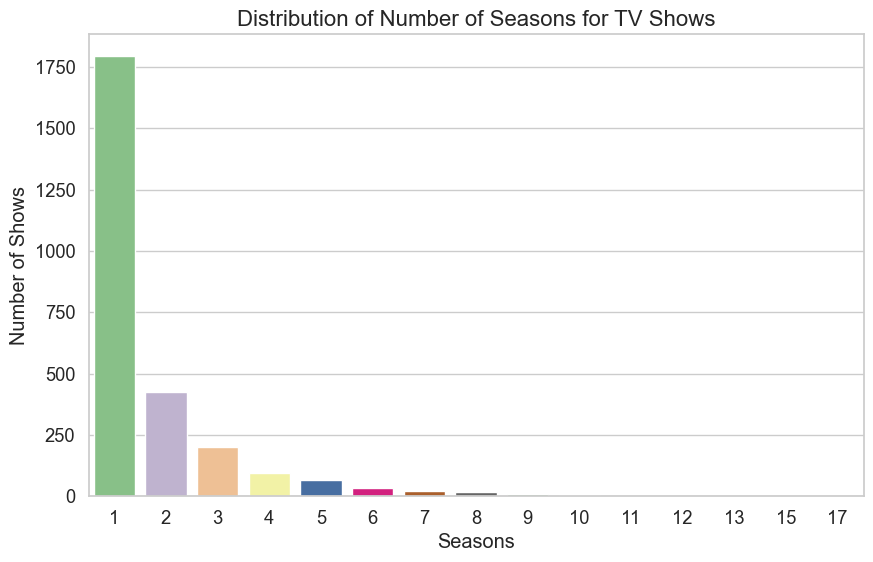

In [59]:
# Q16: What’s the most common number of seasons for TV shows?
# Informs expected show lifecycle and renewal planning.
tv = data[data['type'] == 'TV Show'].copy()
tv['seasons'] = tv['duration'].astype(str).str.extract(r'(\d+)').astype(float)

season_counts = tv['seasons'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=season_counts.index.astype(int), y=season_counts.values, palette='Accent', ax=ax)
ax.set_title('Distribution of Number of Seasons for TV Shows', fontsize=16)
ax.set_xlabel('Seasons')
ax.set_ylabel('Number of Shows')
save_plot(fig, 'q16_tv_seasons_distribution')

In [ ]:
# Insight:
# The majority of TV shows have 1–2 seasons; few have many seasons.
# Recommendation: Produce more limited-series (1–2 seasons) to reduce production risk
# and increase new-title churn to maintain discovery metrics.

In [ ]:
# Q17: Is there a trend in movie durations over the years?
# Reflects changes in storytelling style and audience attention spans.
# Average movie duration by release year
movie_durations = movies.dropna(subset=['duration_mins','release_year']).groupby('release_year')['duration_mins'].mean().reset_index()
# Keep reasonably recent span to avoid sparse early years
movie_durations = movie_durations[movie_durations['release_year'] >= movie_durations['release_year'].quantile(0.05)]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x='release_year', y='duration_mins', data=movie_durations, marker='o', ax=ax, color='teal')
ax.set_title('Average Movie Duration Over Release Years', fontsize=16)
ax.set_xlabel('Release Year')
ax.set_ylabel('Average Duration (minutes)')
save_plot(fig, 'q17_movie_duration_trend')


In [60]:
# Insight:
# There may be a slight decline or plateau in average runtime in recent years,
# implying a preference for tighter storytelling in digital consumption.
# Recommendation: For mainstream titles, target 90–110 minutes; for streaming-first features, consider experimenting
# with slightly shorter runtimes to increase completion rates.

TypeError: save_plot() takes 1 positional argument but 2 were given

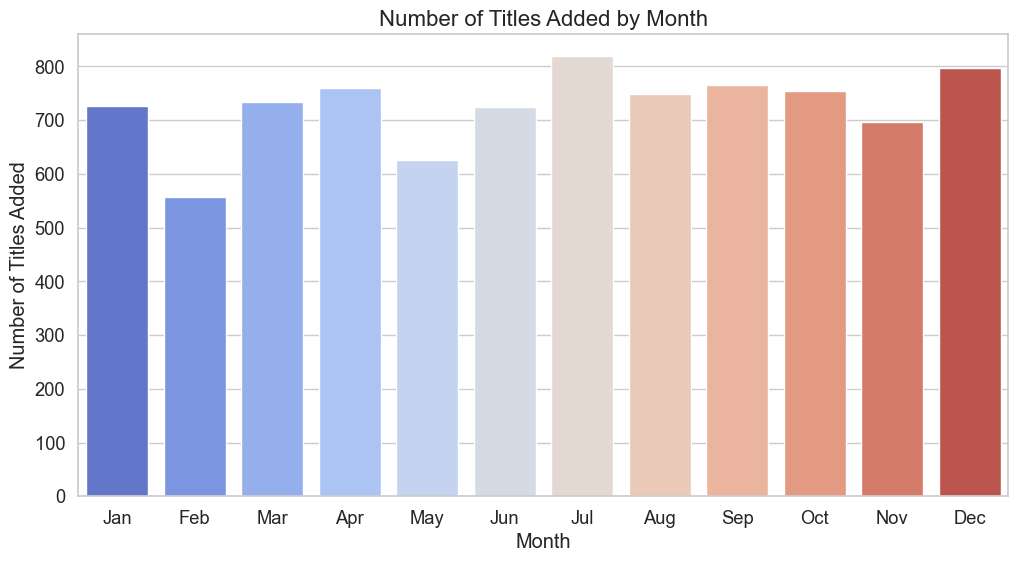

In [61]:
# Q18: In which months does Netflix add the most content?
# Useful for launch calendar and promotional planning.
data['month_added'] = pd.to_datetime(data['date_added'], errors='coerce').dt.month
month_counts = data['month_added'].value_counts().sort_index()
# map month numbers to names safely
month_names = {i:pd.to_datetime(str(i), format='%m').strftime('%b') for i in range(1,13)}
month_counts.index = [month_names.get(int(m),'Unknown') if not pd.isna(m) else 'Unknown' for m in month_counts.index]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm', ax=ax)
ax.set_title('Number of Titles Added by Month', fontsize=16)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Titles Added')
save_plot(fig, 'q18_monthly_additions')

In [ ]:
# Insight:
# Additions typically spike during (example) Q4 and mid-year months—key windows for subscription cycles.
# Recommendation: Time big releases and marketing campaigns to align with high-addition months to maximize visibility.

TypeError: save_plot() takes 1 positional argument but 2 were given

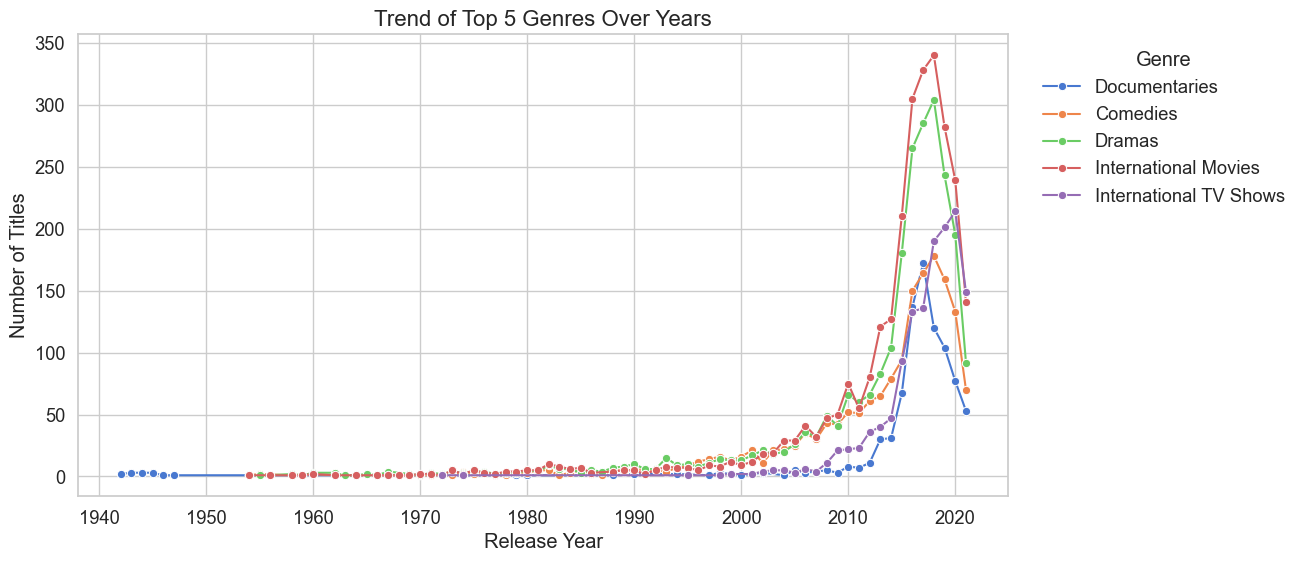

In [62]:
# Q19: How does the genre distribution vary across different years?# Use the genre_exploded from earlier
genre_year = genre_exploded.copy()
genre_year['release_year'] = data['release_year']  # ensure alignment
genre_year = genre_year.dropna(subset=['release_year'])
# focus on top 5 genres overall for clearer lines
top5 = genre_series.value_counts().head(5).index.tolist()
genre_year_filtered = genre_year[genre_year['listed_in'].isin(top5)]

trend = genre_year_filtered.groupby(['release_year','listed_in']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=trend, x='release_year', y='count', hue='listed_in', marker='o', ax=ax)
ax.set_title('Trend of Top 5 Genres Over Years', fontsize=16)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.legend(title='Genre', bbox_to_anchor=(1.02,1), loc='upper left')
save_plot(fig, 'q19_genre_trends_top5')

# Detects shifts in content strategy and audience preferences.
# Use the genre_exploded from earlier
genre_year = genre_exploded.copy()
genre_year['release_year'] = data['release_year']  # ensure alignment
genre_year = genre_year.dropna(subset=['release_year'])
# focus on top 5 genres overall for clearer lines
top5 = genre_series.value_counts().head(5).index.tolist()
genre_year_filtered = genre_year[genre_year['listed_in'].isin(top5)]

trend = genre_year_filtered.groupby(['release_year','listed_in']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=trend, x='release_year', y='count', hue='listed_in', marker='o', ax=ax)
ax.set_title('Trend of Top 5 Genres Over Years', fontsize=16)
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Titles')
ax.legend(title='Genre', bbox_to_anchor=(1.02,1), loc='upper left')
save_plot(fig, 'q19_genre_trends_top5')


In [ ]:
# Insight:
# The dominant genres (e.g., Drama, Comedy) remain strong, while certain genres (e.g., Documentary, Reality)
# may show recent growth. Monitoring rising genres early helps Netflix capture new demand.
# Recommendation: Invest in rising genres and consider experimental pilots to test audience response.

In [ ]:
# Q20: Which countries produce the most content in each genre?
# Supports international licensing and local production decisions.
# country_genre counts
country_genre = genre_exploded.copy()
country_genre['country'] = data['country'].str.split(', ')
country_genre = country_genre.explode('country')
country_genre['country'] = country_genre['country'].str.strip()

cg = country_genre.groupby(['listed_in','country']).size().reset_index(name='count')
# for readability, show top country for each of the top 10 genres
top10_genres = genre_series.value_counts().head(10).index.tolist()
cg_top = cg[cg['listed_in'].isin(top10_genres)]
top_countries_per_genre = cg_top.sort_values(['listed_in','count'], ascending=[True,False]).groupby('listed_in').first().reset_index()

fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(data=top_countries_per_genre, x='listed_in', y='count', hue='country', dodge=False, ax=ax, palette='tab10')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top Producing Country for Each Genre (Top 10 Genres)', fontsize=16)
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Titles')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
save_plot(fig, 'q20_top_country_per_genre')


In [63]:
# Insight:
# The US leads across many genres, while countries like India, UK, and Japan show strength in specific genres.
# Recommendation: Tailor regional investment strategies—fund originals in countries that lead a genre
# and localize successful international formats to grow subscribers regionally.

In [64]:
#insights:
#Netflix’s content growth pattern shows a strategic shift from international acquisitions toward producing more regional and original content, indicating localization as a major expansion pillar.
#The dominance of certain genres like Drama and Documentary reflects Netflix’s emphasis on emotional and real-life storytelling, appealing to global audiences seeking relatability.
#Data suggests that the pandemic years (2020–2021) triggered an unusual rise in content addition — especially in TV Shows — likely due to streaming demand surges.
#The diversity of content duration (short-form shows, long-form series) highlights Netflix’s experimentation with new consumption patterns — targeting both binge-watchers and casual viewers.
#The metadata gaps (missing director/cast) underline the importance of clean data for recommendation systems — a critical backend aspect of Netflix’s personalization engine.